<a href="https://colab.research.google.com/github/rajput-t/leetcode_marathon/blob/main/Customer_Segmentation_using_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation using K-Means
This notebook demonstrates customer segmentation using the K-Means clustering algorithm. The goal is to group customers based on their **annual income** and **spending score** to identify distinct customer segments.

In [30]:
# Dependencies and Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/drive/Othercomputers/DS/JP/Datasets/Mall_Customers.csv')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Select relevant features

In [32]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Feature Scaling
Feature scaling is a crucial step in K-Means as the algorithm is **sensitive to the scale** of the features. We use `StandardScaler` to standardize the features by **removing the mean** and **scaling to unit variance**.

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using Elbow Method to find optimal number of clusters
Inertia is a measure of how well the data is clustered. It is calculated as the sum of squared distances of samples to their closest cluster center. A lower inertia value generally indicates better clustering, as the data points are closer to their respective cluster centroids.

In the Elbow Method plot, inertia is plotted against the number of clusters (k). The "elbow" point on the plot represents the optimal number of clusters where the decrease in inertia starts to slow down.

In [34]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Plot
This code plots the inertia values against the number of clusters (k). The point where the plot forms an **"elbow"** is considered the **optimal number of clusters**.

As seen at around the **5th mark** the graph becomes virtually horizontal; making it the optimal value for **number of clusters**.

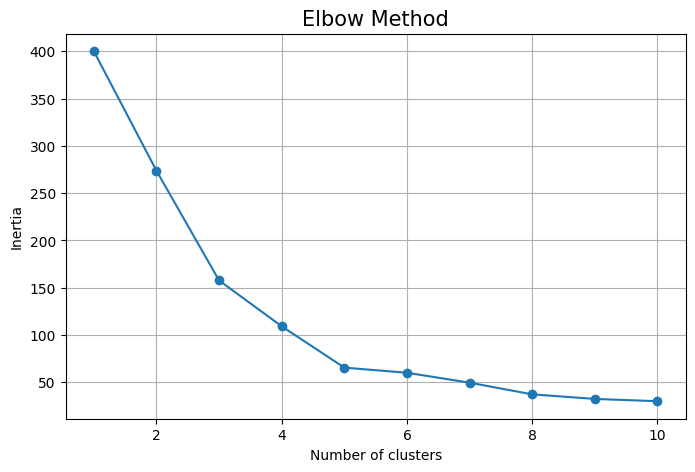

In [35]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method', fontsize=15)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Fitting KMeans with optimal k (assume k=5)

In [36]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing the clusters

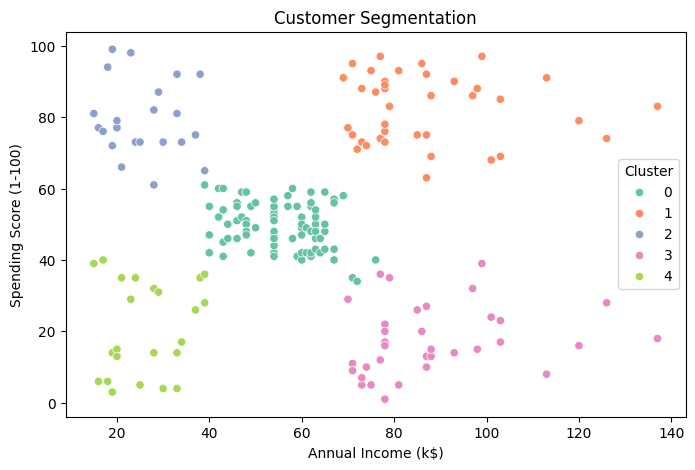

In [37]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
plt.title('Customer Segmentation')
plt.show()

Visualizing this scatterplot; the characteristics of each customer segment is evident. The x-axis represents 'Annual Income (k$)', the y-axis represents 'Spending Score (1-100)', and the points are colored according to their assigned cluster.